In [1]:
import pandas as pd

pd.set_option ('display.max_colwidth',100)

data = pd.read_csv('SMSSpamCollection.tsv', sep='\t', header=None)
data.columns = ['label','body_text']

data.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [2]:
data['body_len']=data['body_text'].apply(lambda x: len(x) - x.count(" "))

#subtract the number of space, to get only character count

data.head()

,label,body_text,body_len
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128
2,ham,"Nah I don't think he goes to usf, he lives around here though",49
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28


In [4]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation]) # count and aggregate
    return round(count/(len(text) - text.count(" ")),3) * 100 #calculate percentage

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

data.head()
    

,label,body_text,body_len,punct%
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


In [8]:
from matplotlib  import pyplot
import numpy as np
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


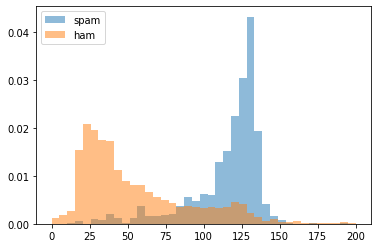

In [14]:
bins = np.linspace(0,200,40)

pyplot.hist(data[data['label'] =='spam']['body_len'],bins,alpha=0.5,normed=True,label='spam')
pyplot.hist(data[data['label'] =='ham']['body_len'],bins,alpha=0.5,normed=True,label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


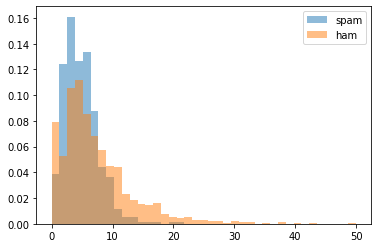

In [16]:
bins = np.linspace(0,50,40)

pyplot.hist(data[data['label'] =='spam']['punct%'],bins,alpha=0.5,normed=True,label='spam')
pyplot.hist(data[data['label'] =='ham']['punct%'],bins,alpha=0.5,normed=True,label='ham')
pyplot.legend(loc='upper right')
pyplot.show()

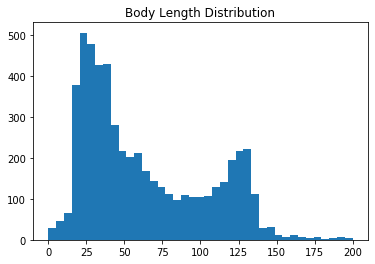

In [18]:
bins = np.linspace(0,200,40)

pyplot.hist(data['body_len'],bins)
pyplot.title("Body Length Distribution")
pyplot.show()

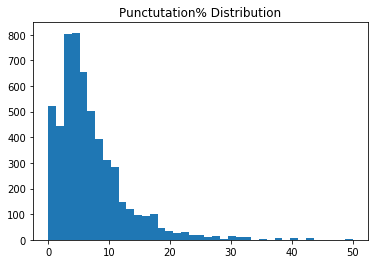

In [19]:
bins = np.linspace(0,50,40)

pyplot.hist(data['punct%'],bins)
pyplot.title("Punctutation% Distribution")
pyplot.show()

## Transformation

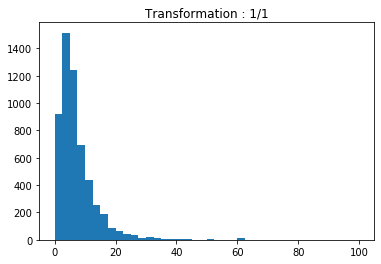

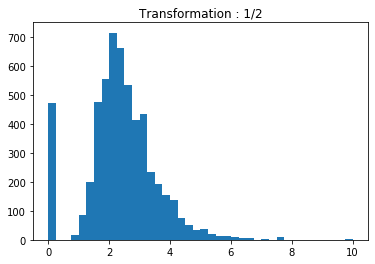

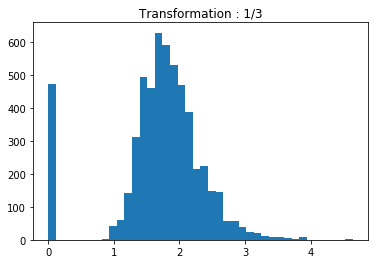

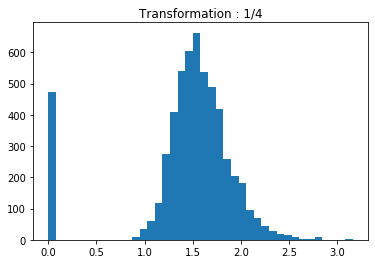

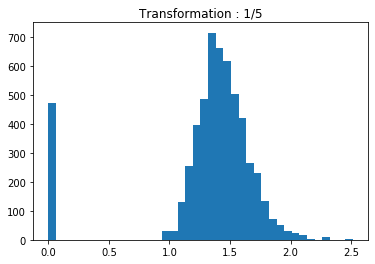

In [22]:
for i in [1,2,3,4,5]:
    pyplot.hist((data['punct%']) ** (1/i), bins=40)
    pyplot.title ("Transformation : 1/{}".format(str(i)))
    pyplot.show()

### any power transformation of 0 punctuations will be 0 and it forms that first solid line at 0, we can ignore that for now